# Inferring The Mean of A Multivariate Normal Distribution (MVN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

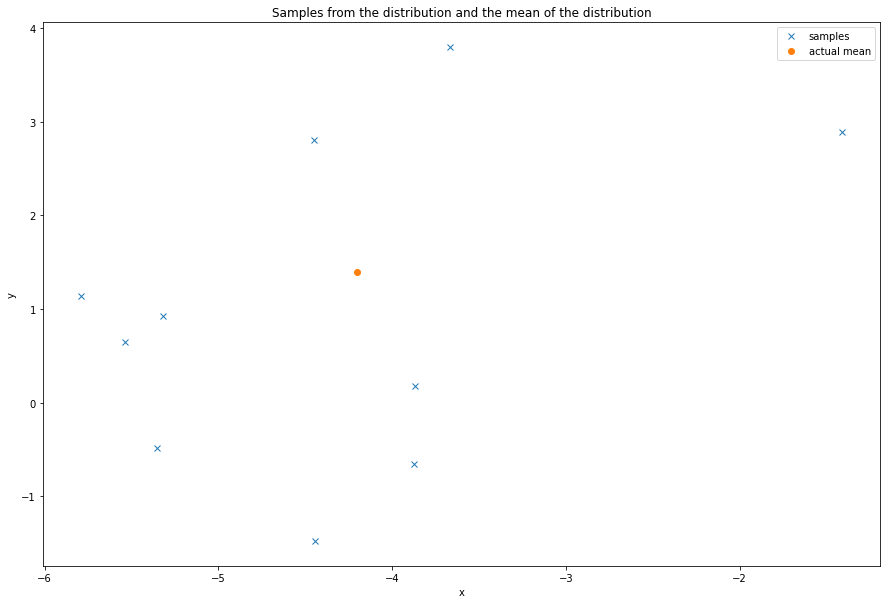

In [2]:
rng = np.random.default_rng(seed=4163874)

# the covariance of the distribution must be positive definite and symmetric
# to construct the covariance matrix, the eigenvalues are chosen to be real 
# and positive. In addition, eigenvectors must be orthogonal.
lambda1 = 1.5
lambda2 = 3.3
v1 = np.array([2.0, -1.0])/np.linalg.norm([2.0, -1.0])
v2 = np.array([1.0, 2.0])/np.linalg.norm([1.0, 2.0])
Q = np.array([v1, v2]).T
Lambda = np.diag(np.array([lambda1, lambda2]))
dist_cov = np.matmul(np.matmul(Q, Lambda), np.linalg.inv(Q))
dist_precision = np.linalg.inv(dist_cov)
dist_mean = np.array([-4.2, 1.4])
x_mean, y_mean = dist_mean.T

sample_size = 10
X1 = rng.multivariate_normal(mean=dist_mean, cov=dist_cov, check_valid='warn', size=sample_size)
x, y = X1.T

fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x, y, 'x', label='samples')
_ = ax.plot(x_mean, y_mean, 'o', label='actual mean')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Samples from the distribution and the mean of the distribution')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

In [3]:
# the covariance of the prior must be positive definite and symmetric
# to construct the covariance matrix, the eigenvalues are chosen to be real 
# and positive. In addition, eigenvectors must be orthogonal.
lambda1 = 2.0
lambda2 = 0.7
v1 = np.array([0.5, 1.3])/np.linalg.norm([0.5, 1.3])
v2 = np.array([1.3, -0.5])/np.linalg.norm([-1.3, -0.5])
Q = np.array([v1, v2]).T
Lambda = np.diag(np.array([lambda1, lambda2]))
prior_cov = np.matmul(np.matmul(Q, Lambda), np.linalg.inv(Q))
prior_precision = np.linalg.inv(prior_cov)
prior_mean = np.array([[3.0], [-2.0]])

In [4]:
# the mean and the covariance of the posterior is computed
posterior_cov = np.linalg.inv(prior_precision+sample_size*dist_precision)
posterior_mean = np.matmul(posterior_cov, (np.matmul(prior_precision, prior_mean)+np.matmul(dist_precision, np.expand_dims(X1.sum(axis=0), axis=0).T)))
print('The actual covariance of the distribution under the mean of the original distribution is as follows:')
print(dist_cov)
print('The covariance for the posterior of the mean of the original distribution is as follows:')
print(posterior_cov)
print('The actual mean of the distribution under the mean of the original distribution is as follows:')
print(np.expand_dims(dist_mean, axis=0).T)
print('The mean for the posterior of the mean of the original distribution is as follows:')
print(posterior_mean)

The actual covariance of the distribution under the mean of the original distribution is as follows:
[[1.86 0.72]
 [0.72 2.94]]
The covariance for the posterior of the mean of the original distribution is as follows:
[[0.15299689 0.06171501]
 [0.06171501 0.25334886]]
The actual mean of the distribution under the mean of the original distribution is as follows:
[[-4.2]
 [ 1.4]]
The mean for the posterior of the mean of the original distribution is as follows:
[[-3.00923928]
 [ 0.5818866 ]]


In [5]:
from scipy.stats import multivariate_normal

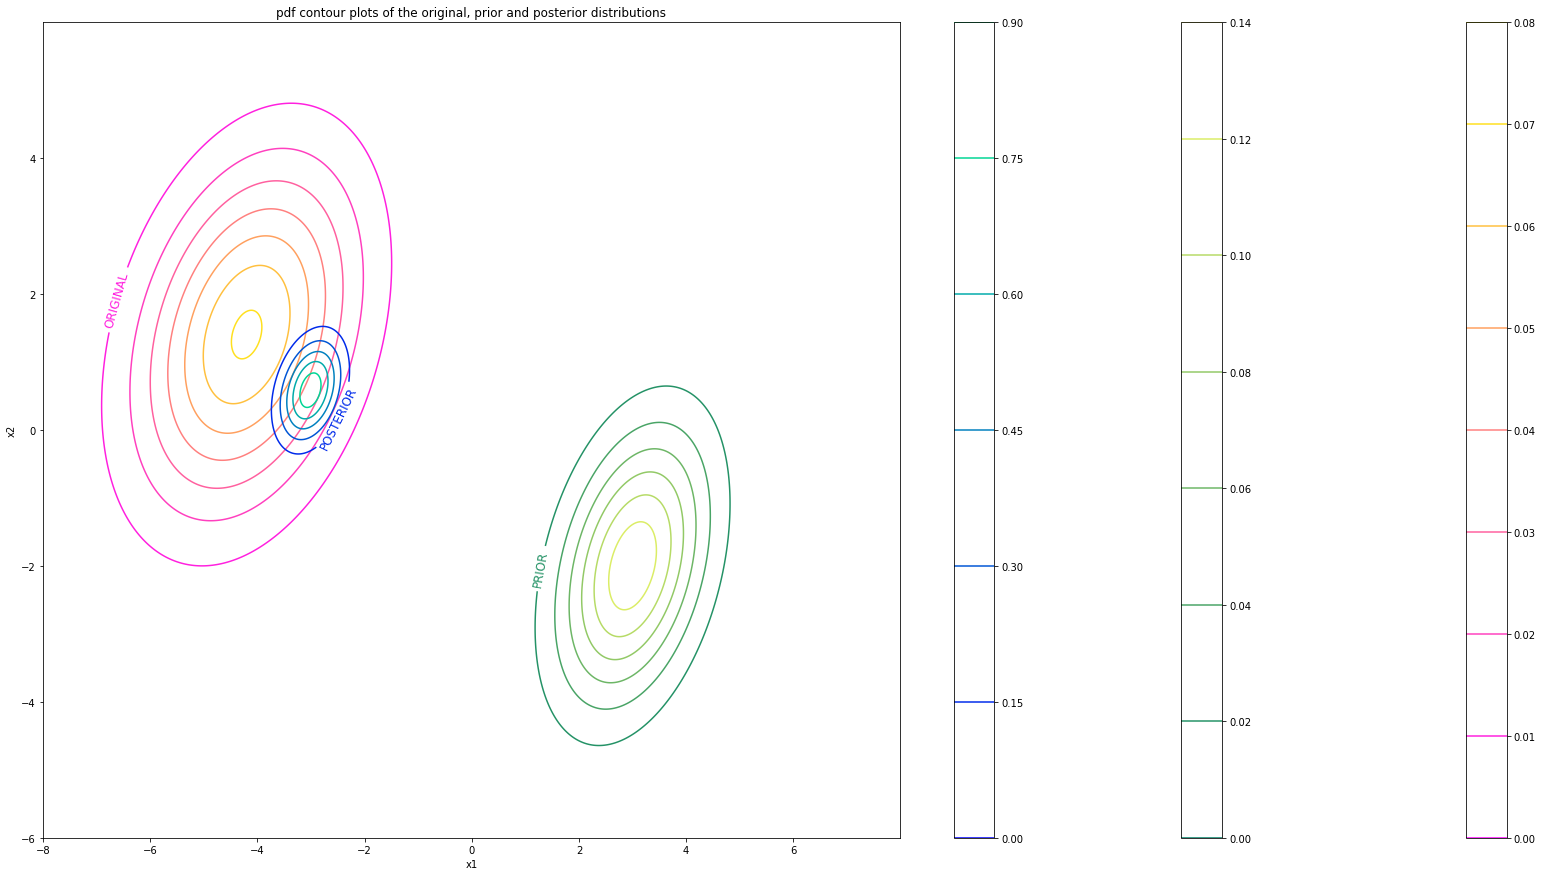

In [6]:
x_min = -8.0
x_max = 8.0
y_min = -6.0
y_max = 6.0
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(dist_mean, dist_cov)
rv2 = multivariate_normal(np.squeeze(prior_mean, axis=1), prior_cov)
rv3 = multivariate_normal(np.squeeze(posterior_mean, axis=1), posterior_cov)

cmap1 = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("summer")
cmap3 = plt.cm.get_cmap("winter")

fig, ax = plt.subplots(figsize=(30, 15))
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)
contour_plot_3 = ax.contour(x, y, rv3.pdf(pos), cmap=cmap3)
_ = fig.colorbar(contour_plot_1, ax=ax)
_ = fig.colorbar(contour_plot_2, ax=ax)
_ = fig.colorbar(contour_plot_3, ax=ax)


fmt = {}
strs = ['ORIGINAL'] * 6
for l, s in zip(contour_plot_1.levels, strs):
    fmt[l] = s
manual_locations = [(-7.0, 2.0)]
ax.clabel(contour_plot_1, contour_plot_1.levels, inline=True, fmt=fmt, fontsize=12, manual=manual_locations)

fmt = {}
strs = ['PRIOR'] * 6
for l, s in zip(contour_plot_2.levels, strs):
    fmt[l] = s
manual_locations = [(1.0, -2.0)]
ax.clabel(contour_plot_2, contour_plot_2.levels, inline=True, fmt=fmt, fontsize=12, manual=manual_locations)

fmt = {}
strs = ['POSTERIOR'] * 6
for l, s in zip(contour_plot_3.levels, strs):
    fmt[l] = s
manual_locations = [(-2.0, 0.0)]
ax.clabel(contour_plot_3, contour_plot_3.levels, inline=True, fmt=fmt, fontsize=12, manual=manual_locations)

_ = ax.set_title('pdf contour plots of the original, prior and posterior distributions')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

## Sequential Update Of The Posterior

In [7]:
first_prior_mean = prior_mean
first_prior_cov = prior_cov
updated_cov_list = []
updated_mean_list = []
num_of_updates = 3
for i in range(num_of_updates):
    prior_precision = np.linalg.inv(prior_cov)
    posterior_cov = np.linalg.inv(prior_precision+sample_size*dist_precision)
    posterior_mean = np.matmul(posterior_cov, (np.matmul(prior_precision, prior_mean)+np.matmul(dist_precision, np.expand_dims(X1.sum(axis=0), axis=0).T)))
    updated_cov_list.append(posterior_cov)
    updated_mean_list.append(posterior_mean)
    prior_cov = posterior_cov
    prior_mean = posterior_mean
    X1 = rng.multivariate_normal(mean=dist_mean, cov=dist_cov, check_valid='warn', size=sample_size)

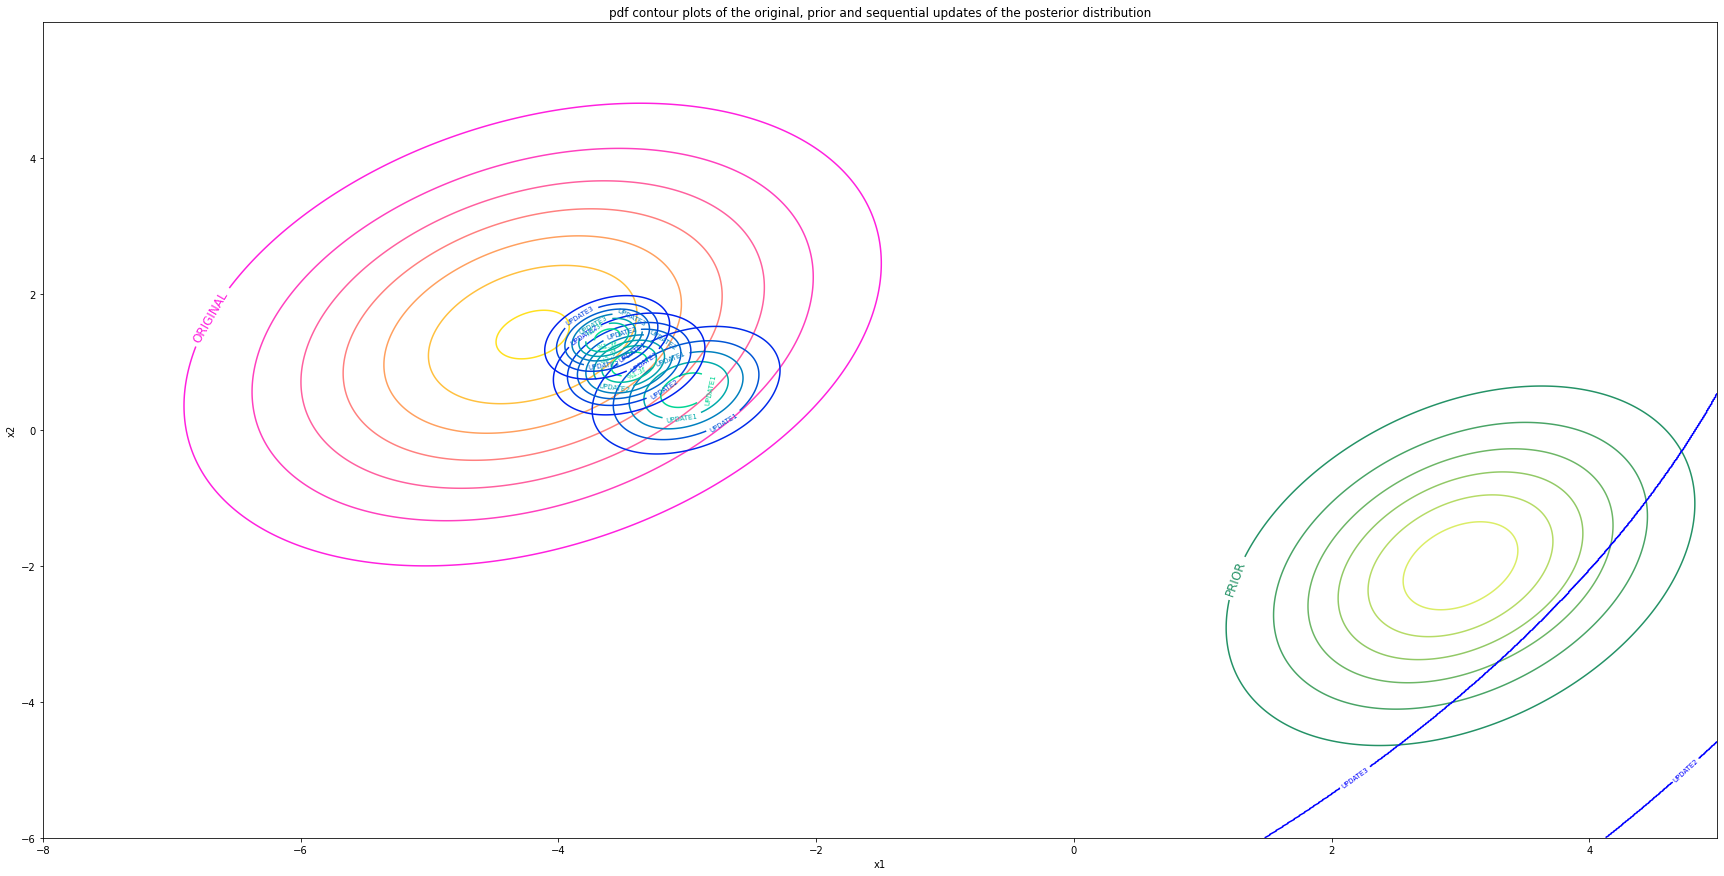

In [8]:
x_min = -8.0
x_max = 5.0
y_min = -6.0
y_max = 6.0
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(dist_mean, dist_cov)
rv2 = multivariate_normal(np.squeeze(first_prior_mean, axis=1), first_prior_cov)

cmap1 = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("summer")
cmap3 = plt.cm.get_cmap("winter")

fig, ax = plt.subplots(figsize=(30, 15))
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)

fmt = {}
strs = ['ORIGINAL'] * 6
for l, s in zip(contour_plot_1.levels, strs):
    fmt[l] = s
manual_locations = [(-7.0, 2.0)]
ax.clabel(contour_plot_1, levels=contour_plot_1.levels, inline=True, fmt=fmt, fontsize=12, manual=manual_locations)

fmt = {}
strs = ['PRIOR'] * 6
for l, s in zip(contour_plot_2.levels, strs):
    fmt[l] = s
manual_locations = [(1.0, -2.0)]
ax.clabel(contour_plot_2, levels=contour_plot_2.levels, inline=True, fmt=fmt, fontsize=12, manual=manual_locations)

for i in range(num_of_updates):
    rv3 = multivariate_normal(np.squeeze(updated_mean_list[i], axis=1), updated_cov_list[i])
    contour_plot_3 = ax.contour(x, y, rv3.pdf(pos), cmap=cmap3)
    fmt = {}
    strs = ['UPDATE'+repr(i+1)] * 6
    for l, s in zip(contour_plot_3.levels, strs):
        fmt[l] = s
    ax.clabel(contour_plot_3, levels=contour_plot_3.levels, inline=True, fmt=fmt, fontsize=7)

_ = ax.set_title('pdf contour plots of the original, prior and sequential updates of the posterior distribution')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

# Conclusion
As can be observed from the above figure, as the sequential update of the posterior for the mean, the posterior distribution approaches the original distribution of the mean.

# Reference

Pattern Recognition and Machine Learning, Christopher M. Bishop.

Machine Learning A Probabilistic Perspective, Kevin P. Murphy.